# SVMを使って２次元に圧縮、可視化するまで


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


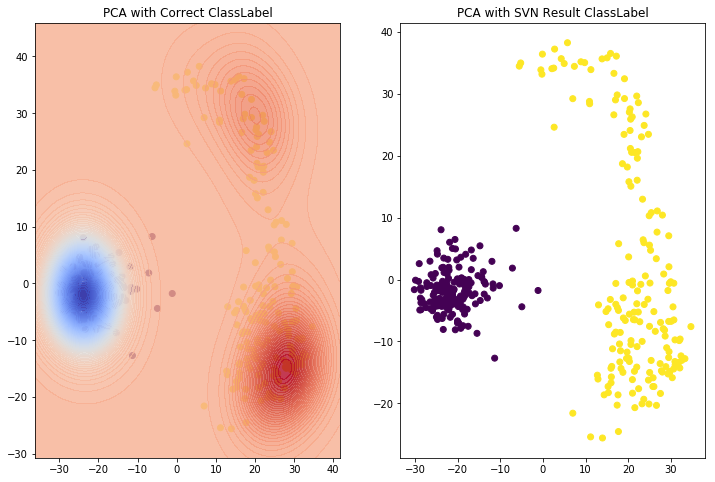

In [2]:
# encoding: utf-8
# -*- encoding : utf-8 -*-
import numpy as np
from sklearn.svm import SVC

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import PIL
import matplotlib.pyplot as plt
from sklearn.datasets.base import load_digits
from sklearn.decomposition import PCA

%matplotlib inline

#データ準備
#入力ベクトルデータ
data = load_digits(n_class = 2)
X,Y = data.data, data.target

######
#学習#
######
#SVMを用意
clf = SVC()
#SVMで学習
clf.fit(X, Y)

#PCAを用意
pca = PCA(n_components=2)
#PCAで次元圧縮
pca.fit(X)
#PCAの結果を元にデータを変換
pca_X = pca.transform(X)

##################
#データの可視化#
##################

#グラフを表示する用意
fig0, (ax0, ax1) = plt.subplots(1,2,figsize=(12,8))

#PCAデータの点を表示
ax0.set_title("PCA with Correct ClassLabel")
ax0.scatter(pca_X[:,0], pca_X[:,1], c=Y)

#SVNデータの点を表示
Z = clf.predict(X)
ax1.set_title("PCA with SVN Result ClassLabel")
ax1.scatter(pca_X[:,0], pca_X[:,1], c=Z)

##################
#決定境界の可視化#
##################
#x座標方向に100個の値を取得
x = np.linspace(np.min(pca_X[:,0])*1.2, np.max(pca_X[:,0])*1.2, 100)
#y座標方向に100個の値を取得
y = np.linspace(np.min(pca_X[:,1])*1.2, np.max(pca_X[:,1])*1.2, 100)
#上記のx,yを組み合わせた10000個の点のx座標と,y座標の配列を取得
x_g, y_g = np.meshgrid(x, y)

#np,c_で二つの座標を結びつけた状態で, PCAの逆変換
before_inv_pca = np.c_[x_g.ravel(), y_g.ravel()]
after_inv_pca = pca.inverse_transform(before_inv_pca)

#PCAの逆変換後64次元データをSVMで分類
z_g = clf.decision_function(after_inv_pca)
#z_gは配列の列になっているが、グラフに表示するために(100, 100)の形に戻す
z_g = z_g.reshape(x_g.shape)

#背景として決定境界の色塗り
ax0.contourf(x_g,y_g,z_g,cmap=plt.cm.coolwarm, alpha=0.8, levels=np.linspace(np.min(z_g), np.max(z_g), 100));

#表示をする
plt.savefig("image.png")
plt.show()

In [3]:
Y

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  8.,  1.,  0.],
       [ 0.,  0.,  6., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])